In [73]:
import numpy as np
import math
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [101]:

df = pd.read_csv('../data/interim/DATASET.csv', delimiter=';')
df = df[:155]
fp_array = np.zeros((0,), dtype=np.int8) #создаем массив из нулей
for i in range(len(df['Reaction SMILES'])): #итерируемся по столбцу со smiles реакций
  r = df['Reaction SMILES'].loc[i].split('>>') #разделяем smiles реакции на smiles реагентов и smiles продуктов
  reactants = r[0].split('.') #разделяем общий smiles реагентов на smiles отдельных молекул реагентов
  products = r[1].split('.') #разделяем общий smiles продуктов на smiles отдельных молекул продуктов
  for j in reactants:
    # print(j)
    r_mol = Chem.MolFromSmiles(j) #превращаем smiles в молекулу rdkit
    r_fp = AllChem.GetMorganFingerprintAsBitVect(r_mol, 2, nBits=32) #получаем fingerprint с радиусом=2 из молекулы
    ConvertToNumpyArray(r_fp, fp_array) #превращаем fingerprint в массив
    # print(fp_array) #это итоговый фингерпринт в виде массива
  for k in products: #то же самое для продуктов
    p_mol = Chem.MolFromSmiles(k)
    p_fp = AllChem.GetMorganFingerprintAsBitVect(p_mol, 2, nBits=32)
    ConvertToNumpyArray(p_fp, fp_array)
    #print(fp_array)

# #Дальше тут все то же самое для столбцов с условиями реакций
#Это все можно запихнуть в один цикл, но я не знаю в каком виде это нужно будет для модели, поэтому пока так сделала
for i in range(len(df['Reagent1_SMILES'])):  #итерируемся по столбцу реагентов
  if type(df['Reagent1_SMILES'].loc[i]) != float: #пропускаем пустые ячейки
    reag1_mol = Chem.MolFromSmiles(df['Reagent1_SMILES'].loc[i]) #превращаем smiles в молекулу
    reag1_fp = AllChem.GetMorganFingerprintAsBitVect(reag1_mol, 2, nBits=32) #получаем fingerprint из молекулы
    ConvertToNumpyArray(reag1_fp, fp_array) #превращаем fingerprint в массив
    # print(len(fp_array)) #это итоговый фингерпринт реагента в виде массива

for i in range(len(df['Reagent2_SMILES'])):  
  if type(df['Reagent2_SMILES'].loc[i]) != float:
    reag2_mol = Chem.MolFromSmiles(df['Reagent2_SMILES'].loc[i])
    reag2_fp = AllChem.GetMorganFingerprintAsBitVect(reag2_mol, 2, nBits=32)
    ConvertToNumpyArray(reag2_fp, fp_array)
    #print(fp_array)
     

for i in range(len(df['Solvent1_SMILES'])):  
  if type(df['Solvent1_SMILES'].loc[i]) != float:
    solv1_mol = Chem.MolFromSmiles(df['Solvent1_SMILES'].loc[i])
    solv1_fp = AllChem.GetMorganFingerprintAsBitVect(solv1_mol, 2, nBits=32)
    ConvertToNumpyArray(solv1_fp, fp_array)
    #print(fp_array)
    # print(len(fp_array))

for i in range(len(df['Solvent2_SMILES'])):  
  if type(df['Solvent2_SMILES'].loc[i]) != float:
    solv2_mol = Chem.MolFromSmiles(df['Solvent2_SMILES'].loc[i])
    solv2_fp = AllChem.GetMorganFingerprintAsBitVect(solv2_mol, 2, nBits=32)
    ConvertToNumpyArray(solv2_fp, fp_array)
    #print(fp_array)

for i in range(len(df['Catalyst_SMILES'])):  
  if type(df['Catalyst_SMILES'].loc[i]) != float:
    cat_mol = Chem.MolFromSmiles(df['Catalyst_SMILES'].loc[i])
    cat_fp = AllChem.GetMorganFingerprintAsBitVect(cat_mol, 2, nBits=32)
    ConvertToNumpyArray(cat_fp, fp_array)
    #print(fp_array)
    # print(len(fp_array))

[14:42:58] WARNING: not removing hydrogen atom without neighbors
[14:42:58] WARNING: not removing hydrogen atom without neighbors
[14:42:58] WARNING: not removing hydrogen atom without neighbors


In [128]:
data = pd.read_csv('../data/interim/DATASET.csv', delimiter=';')
data = data[:154]
data = data[~(data['Reaction ID'].isin([55883694, 23404571, 25406145, 22959501, 24137279]))]

In [129]:
data

,Reaction ID,Reactant,Product,Reaction SMILES,Fulltext of reaction,Number of Stages,Time (Reaction Details) [h],Temperature (Reaction Details) [C],Pressure (Reaction Details) [Torr],pH-Value (Reaction Details),...,Reagent1_SMILES,Reagent_2,Reagent2_SMILES,Solvent_1,Solvent1_SMILES,Solvent_2,Solvent2_SMILES,Catalyst,Catalyst_SMILES,Unnamed: 21
0,5285945.0,para-nitrophenyl bromide,5-bromo-2-nitroaniline,BrC1=CC=C(C=C1)N(=O)=O>>NC1=CC(Br)=CC=C1N(=O)=O,Example 14a; 7V-(2-Amino-5-(lH-pyrrol-2-yl)phe...,NaN,4.83333,10.0,NaN,NaN,...,CON,Potassium tert-butoxide,[K+].CC(C)(C)[O-],"1,2-dimethoxyethane",COCCOC,"N,N-dimethyl-formamide",CN(C)C=O,copper(l) chloride,[Cl-].[Cu+],NaN
1,5285945.0,para-nitrophenyl bromide,5-bromo-2-nitroaniline,BrC1=CC=C(C=C1)N(=O)=O>>NC1=CC(Br)=CC=C1N(=O)=O,NaN,NaN,NaN,20.0,NaN,NaN,...,CON,Potassium tert-butoxide,[K+].CC(C)(C)[O-],"N,N-dimethyl-formamide",CN(C)C=O,NaN,NaN,copper(l) chloride,[Cl-].[Cu+],NaN
2,727677.0,"1,2-naphthoquinone","4-amino-1,2-naphthoquinone",O=C1C=CC2=C(C=CC=C2)C1=O>>NC1=CC(=O)C(=O)C2=CC...,"In brief, to a stirred suspension of compound ...",NaN,NaN,NaN,NaN,NaN,...,[Na+].[N-]=[N+]=[N-],acetic acid,CC(O)=O,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,727677.0,"1,2-naphthoquinone","4-amino-1,2-naphthoquinone",O=C1C=CC2=C(C=CC=C2)C1=O>>NC1=CC(=O)C(=O)C2=CC...,NaN,NaN,2.00000,80.0,NaN,NaN,...,C[Si](C)(C)N=[N+]=[N-],NaN,NaN,"N,N-dimethyl-formamide",CN(C)C=O,NaN,NaN,NaN,NaN,NaN
4,727677.0,"1,2-naphthoquinone","4-amino-1,2-naphthoquinone",O=C1C=CC2=C(C=CC=C2)C1=O>>NC1=CC(=O)C(=O)C2=CC...,NaN,NaN,2.00000,40.0,NaN,NaN,...,[Na+].[N-]=[N+]=[N-],NaN,NaN,water,O,acetic acid,CC(O)=O,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,49993643.0,"4,4-diethyl-2,2-dimethylchroman","4,4-diethyl-2,2-dimethylchroman-6-amine",CCC1(CC)CC(C)(C)OC2=C1C=CC=C2>>CCC1(CC)CC(C)(C...,"General procedure: A 25-mL, three-necked, roun...",2.0,2.00000,85.0,NaN,NaN,...,O[N+]([O-])=O,acetic anhydride,CC(=O)OC(C)=O,ethanol,CCO,water,O,iron,[Fe],NaN
150,53956135.0,"1,1,3,3-tetraethyl-5-nitroisoindoline","5-amino-6-nitro-1,1,3,3-tetraethylisoindoline",CCC1(CC)NC(CC)(CC)C2=C1C=CC(=C2)N(=O)=O>>CCC1(...,NaN,NaN,40.00000,23.0,NaN,NaN,...,[K+].CC(C)(C)[O-],"N,N,N-trimethylhydrazinium iodide",[I-].C[N+](C)(C)N,dimethyl sulfoxide,C[S](C)=O,NaN,NaN,NaN,NaN,NaN
151,53956135.0,"1,1,3,3-tetraethyl-5-nitroisoindoline","5-amino-6-nitro-1,1,3,3-tetraethylisoindoline",CCC1(CC)NC(CC)(CC)C2=C1C=CC(=C2)N(=O)=O>>CCC1(...,NaN,NaN,14.00000,NaN,NaN,NaN,...,[K+].CC(C)(C)[O-],"N,N,N-trimethylhydrazinium iodide",[I-].C[N+](C)(C)N,dimethyl sulfoxide,C[S](C)=O,NaN,NaN,NaN,NaN,NaN
152,57338413.0,methyl 4-(picolinamido)benzoate,methyl 3-amino-4-(picolinamido)benzoate,COC(=O)C1=CC=C(NC(=O)C2=CC=CC=N2)C=C1>>COC(=O)...,General procedure: A solution of 2-picolinamid...,2.0,16.00000,80.0,NaN,NaN,...,N=C(c1ccccc1)c2ccccc2,hydrogenchloride,Cl,toluene,Cc1ccccc1,tetrahydrofuran,C1CCOC1,copper(l) chloride,[Cl-].[Cu+],NaN


In [130]:
data['Temperature (Reaction Details) [C]'] = data['Temperature (Reaction Details) [C]'].fillna(20.0)

In [131]:
data['Temperature (Reaction Details) [C]'].unique()

array([ 10. ,  20. ,  80. ,  40. , 155. ,  25. ,   0. , 170. ,  30. ,
        65. ,  18. ,  90. ,  23. ,  52.5,  12.5,  44. ,  85. ,  75. ,
        50. ,  60. ,  55. ,   5. ,   2.5, -78. ,  -5. , 100. ,  95. ])

In [143]:
dataset = data.copy()

In [144]:
pd.options.mode.chained_assignment = None

In [145]:
for temp in data['Temperature (Reaction Details) [C]'].unique():
    df2 = dataset[dataset['Temperature (Reaction Details) [C]'] == temp]
    df3 = dataset[dataset['Temperature (Reaction Details) [C]'] == temp]
    df4 = dataset[dataset['Temperature (Reaction Details) [C]'] == temp]
    df5 = dataset[dataset['Temperature (Reaction Details) [C]'] == temp]
    df6 = dataset[dataset['Temperature (Reaction Details) [C]'] == temp]
    df7 = dataset[dataset['Temperature (Reaction Details) [C]'] == temp]
    df2['Temperature (Reaction Details) [C]'] = temp - 1
    df3['Temperature (Reaction Details) [C]'] = temp + 1
    df4['Temperature (Reaction Details) [C]'] = temp - 2
    df5['Temperature (Reaction Details) [C]'] = temp + 2
    df6['Temperature (Reaction Details) [C]'] = temp - 2.5
    df7['Temperature (Reaction Details) [C]'] = temp + 2.5
    dataset = pd.concat([dataset, df2, df3, df4, df5, df6, df7], axis=0)

In [146]:
dataset = dataset.reset_index().drop('index', axis=1)
dataset.shape

(1427, 22)

In [136]:
# np.random.seed(129)
# indices = np.random.rand(data.shape[0])
# train_idx, val_index,  test_idx = indices[:60], indices[60:80], indices[80:]
# train, val, test = data[train_idx,:], data[val_index,:], data[test_idx,:]

In [148]:
np.random.seed(129)
test_size = 0.2
val_size = 0.2
rand = np.random.rand(dataset.shape[0])
train_mask = rand > (test_size + val_size)
val_mask = (rand < (test_size + val_size)) & (rand > val_size)
test_mask = rand < val_size

In [149]:
np.intersect1d(np.array(dataset[train_mask].index), np.array(dataset[test_mask].index))

array([], dtype=int64)

In [150]:
splited_reaction = dataset['Reaction SMILES'].str.split('>>')

In [151]:
new_df = pd.DataFrame()
new_df[['Reactants', 'Products']] = splited_reaction.tolist()


In [152]:
new_df

,Reactants,Products
0,BrC1=CC=C(C=C1)N(=O)=O,NC1=CC(Br)=CC=C1N(=O)=O
1,BrC1=CC=C(C=C1)N(=O)=O,NC1=CC(Br)=CC=C1N(=O)=O
2,O=C1C=CC2=C(C=CC=C2)C1=O,NC1=CC(=O)C(=O)C2=CC=CC=C12
3,O=C1C=CC2=C(C=CC=C2)C1=O,NC1=CC(=O)C(=O)C2=CC=CC=C12
4,O=C1C=CC2=C(C=CC=C2)C1=O,NC1=CC(=O)C(=O)C2=CC=CC=C12
...,...,...
1422,C1COC2=C(OCCOCCOC3=C(OCCO1)C=CC=C3)C=CC=C2,NC1=CC2=C(OCCOCCOC3=C(OCCOCCO2)C=CC=C3)C=C1
1423,C1COC2=C(OCCOCCOC3=C(OCCO1)C=CC=C3)C=CC=C2,NC1=CC2=C(OCCOCCOC3=C(OCCOCCO2)C=CC=C3)C=C1
1424,C1COC2=C(OCCOCCOC3=C(OCCO1)C=CC=C3)C=CC=C2,NC1=CC2=C(OCCOCCOC3=C(OCCOCCO2)C=CC=C3)C=C1
1425,C1COC2=C(OCCOCCOC3=C(OCCO1)C=CC=C3)C=CC=C2,NC1=CC2=C(OCCOCCOC3=C(OCCOCCO2)C=CC=C3)C=C1


In [153]:
reactants = new_df['Reactants'].str.split('.')
df_reactants = pd.DataFrame(reactants.values.tolist(), reactants.index).add_prefix('Reagent_')

In [154]:
# products = new_df['Products'].str.split('.')
# df_products = pd.DataFrame(products.values.tolist(), products.index).add_prefix('Products_')
# products

In [155]:
def get_fingerprint(x, nBits):
    fp_array = np.zeros((0,), dtype=np.int8)
    if x is not None and type(x) != float:
        mol = Chem.MolFromSmiles(x)
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=nBits) 
        ConvertToNumpyArray(fp, fp_array)
        return fp_array
    else:
        return np.zeros((nBits,), dtype=np.int8)

In [156]:
# df_products = df_products.applymap(get_fingerprint)
df_products = new_df['Products'].apply(get_fingerprint, nBits=128).to_frame().set_index(dataset.index)

In [157]:
df_reactants = df_reactants.applymap(lambda x: get_fingerprint (x, nBits=128)).set_index(dataset.index)

In [158]:
cols = ['Reagent1_SMILES', 'Reagent2_SMILES', 'Solvent1_SMILES', 'Solvent2_SMILES']
df_added = dataset[cols].applymap(lambda x: get_fingerprint (x, nBits=64))
df_added['Catalyst'] = dataset['Catalyst_SMILES'].apply(get_fingerprint, nBits=32).to_frame().set_index(dataset.index)

[20:46:19] WARNING: not removing hydrogen atom without neighbors
[20:46:19] WARNING: not removing hydrogen atom without neighbors
[20:46:19] WARNING: not removing hydrogen atom without neighbors
[20:46:19] WARNING: not removing hydrogen atom without neighbors
[20:46:19] WARNING: not removing hydrogen atom without neighbors
[20:46:19] WARNING: not removing hydrogen atom without neighbors
[20:46:19] WARNING: not removing hydrogen atom without neighbors
[20:46:19] WARNING: not removing hydrogen atom without neighbors
[20:46:19] WARNING: not removing hydrogen atom without neighbors
[20:46:19] WARNING: not removing hydrogen atom without neighbors
[20:46:19] WARNING: not removing hydrogen atom without neighbors
[20:46:19] WARNING: not removing hydrogen atom without neighbors
[20:46:19] WARNING: not removing hydrogen atom without neighbors
[20:46:19] WARNING: not removing hydrogen atom without neighbors
[20:46:19] WARNING: not removing hydrogen atom without neighbors
[20:46:19] WARNING: not r

In [159]:
final_dataset = pd.concat([df_reactants,  df_products, df_added], axis=1)
final_dataset = final_dataset[final_dataset.columns].apply(np.concatenate, axis=1)

In [160]:
# df_cond = pd.DataFrame()
# df_cond['Temperature'] = dataset['Temperature (Reaction Details) [C]'].fillna(20.0)
# df_cond['Pressure'] = dataset['Pressure (Reaction Details) [Torr]'].fillna(760.051)
# df_cond

In [161]:
temp_series = dataset['Temperature (Reaction Details) [C]']

In [163]:
scaler = MinMaxScaler()
temp_series[train_mask] = scaler.fit_transform(temp_series[train_mask].to_numpy().reshape(-1, 1)).reshape(-1,)
temp_series[test_mask] = scaler.transform(temp_series[test_mask].to_numpy().reshape(-1, 1)).reshape(-1,)
temp_series[val_mask] = scaler.transform(temp_series[val_mask].to_numpy().reshape(-1, 1)).reshape(-1,)

In [164]:
final_dataset = pd.concat([final_dataset, temp_series], axis=1)
final_dataset = final_dataset[final_dataset.columns].apply(np.hstack, axis=1).to_frame()
final_dataset['Yield'] = dataset['Yield (numerical)']
final_dataset = final_dataset.rename(columns={0: 'fingerprint'})

In [169]:
final_dataset.iloc[0, 0].shape


(673,)

In [171]:
train = final_dataset[train_mask]
val = final_dataset[val_mask]
test = final_dataset[test_mask]

train.to_json('../data/processed/train.csv')
val.to_json('../data/processed/val.csv')
test.to_json('../data/processed/test.csv')

In [170]:
final_dataset[train_mask].shape

(806, 2)

In [172]:
# preprocess -> save dataset train and test
import torch
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
from torch import nn
from torch.utils.data import DataLoader
from torch.autograd import Variable

In [256]:
class CustomImageDataset(Dataset):
    def __init__(self, data_dir, transform=False):
        self.data = pd.read_json(data_dir)
        self.transform = transform
        if self.transform is True:
            self.X = torch.from_numpy(np.stack(self.data.fingerprint.apply(lambda x: np.array(x)).to_numpy()).astype(np.float64))
        else: 
            self.X = self.data.fingerprint
        if self.transform is True:
            self.y = torch.from_numpy(self.data.Yield.to_numpy().astype(np.float64))
        else: 
            self.y = self.data.Yield

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [174]:
training_data = CustomImageDataset(
    data_dir="../data/processed/train.csv",
    transform=True
)

val_data = CustomImageDataset(
    data_dir="../data/processed/val.csv",
    transform=True
)

In [175]:
type(training_data.y)

torch.Tensor

In [176]:
loss_fn = nn.MSELoss()
learning_rate = 1e-3
batch_size = 12
epochs = 100

In [177]:
type(training_data.X)

torch.Tensor

In [179]:
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=batch_size, shuffle=True)

In [426]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(673, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [428]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [429]:
def train_loop(dataloader, model, loss_fn, optimizer, num_epoch):
    size = len(dataloader.dataset)
    
    for batch, (X, y) in enumerate(dataloader):
        X = Variable(X).float()
        y = Variable(y).float()
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    #     # plotting
    # my_plot(np.linspace(1, num_epoch, num_epoch).astype(int), loss.detach().numpy())


def val_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X = Variable(X).float()
            y = Variable(y).float()
            pred = model(X)
            test_loss += loss_fn(pred, y).item()

    test_loss /= num_batches
    print(f"Test Error: \n Avg loss: {test_loss:>8f} \n")

In [ ]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer, t)
    val_loop(val_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 4291.071289  [    0/  806]
Test Error: 
 Avg loss: 3858.061045 

Epoch 2
-------------------------------
loss: 4401.107910  [    0/  806]
Test Error: 
 Avg loss: 1690.193477 

Epoch 3
-------------------------------
loss: 2684.299561  [    0/  806]


C:\Users\nikit\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\nikit\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\nikit\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([9])) that is different to the input size (torch.Size([9, 1])). This will likely lead to incorrect re

Test Error: 
 Avg loss: 630.599897 

Epoch 4
-------------------------------
loss: 870.763306  [    0/  806]
Test Error: 
 Avg loss: 598.936002 

Epoch 5
-------------------------------
loss: 717.156860  [    0/  806]
Test Error: 
 Avg loss: 641.333581 

Epoch 6
-------------------------------
loss: 670.038208  [    0/  806]
Test Error: 
 Avg loss: 605.407036 

Epoch 7
-------------------------------
loss: 685.612061  [    0/  806]
Test Error: 
 Avg loss: 624.353091 

Epoch 8
-------------------------------
loss: 670.062012  [    0/  806]
Test Error: 
 Avg loss: 604.842153 

Epoch 9
-------------------------------
loss: 948.232849  [    0/  806]
Test Error: 
 Avg loss: 624.155329 

Epoch 10
-------------------------------
loss: 600.639771  [    0/  806]
Test Error: 
 Avg loss: 617.040221 

Epoch 11
-------------------------------
loss: 388.947662  [    0/  806]
Test Error: 
 Avg loss: 632.869805 

Epoch 12
-------------------------------
loss: 663.618652  [    0/  806]
Test Error: 
 Av

In [ ]:
test_data = CustomImageDataset(
    data_dir="../data/processed/val.csv",
    transform=True
)
test_dataloader = DataLoader(test_data, batch_size=len(test_data), shuffle=False)

In [386]:
def r2_loss(output, target):
    output = output.squeeze()
    target_mean = torch.mean(target)
    ss_tot = torch.sum((target - target_mean) ** 2)
    ss_res = torch.sum((target - output) ** 2)
    r2 = 1 - ss_res / ss_tot
    return r2

def mae_loss(output, target):
    output = output.squeeze()
    ss_res = torch.abs((target - output))
    return torch.sum(ss_res)/len(target)

In [410]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    rmse, mae, r2 = 0,0,0

    with torch.no_grad():
        for X, y in dataloader:
            X = Variable(X).float()
            y = Variable(y).float()
            pred = model(X)
            rmse += torch.sqrt(loss_fn(pred, y))
            mae += mae_loss(pred, y)
            r2 += r2_loss(pred, y)
            plt.figure(figsize=(15, 10))
            plt.plot(np.arange(len(y)), pred.squeeze(), label="Predict")
            plt.plot(np.arange(len(y)), y, label="Actual")
            plt.legend()
            plt.show()

    rmse /= num_batches
    mae /= num_batches
    r2 /= num_batches
    print(f"Test Error: \n RMSE: {rmse:>8f} \n MAE: {mae:>8f} \n R2: {r2:>8f} \n")

In [411]:
loss1 = nn.MSELoss()

C:\Users\nikit\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([309])) that is different to the input size (torch.Size([309, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


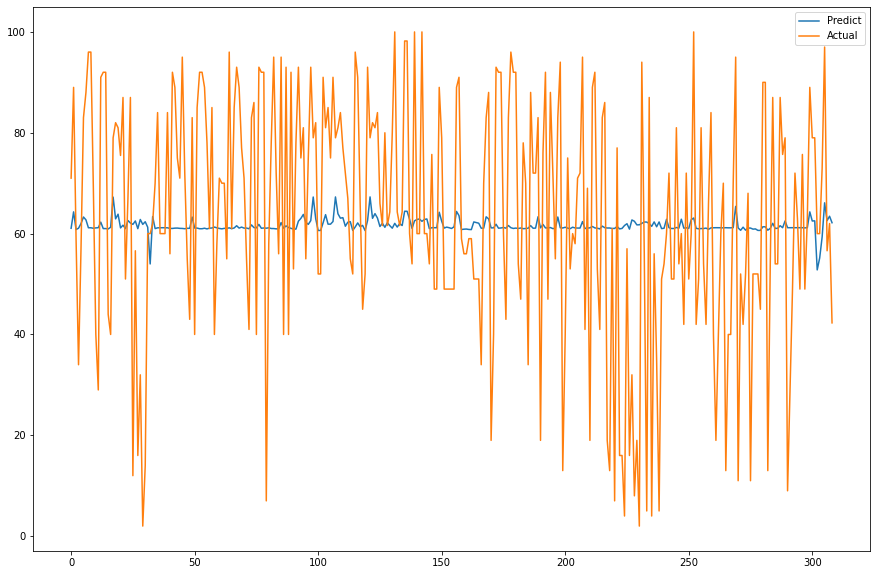

Test Error: 
 RMSE: 23.973936 
 MAE: 19.238333 
 R2: 0.018145 



In [412]:
test_loop(test_dataloader, model, loss1)